# Задача 4. Про pandas

Дан датафрейм, содержащий распаршенную с сайта reverb информацию об объявлениях о продаже электрогитар.
Поля там такие:

`title` - заголовок объявления
`description` и `text` - что-то из описания объявления
`price` - цена в долларах
`params_dict` - словарь параметров (чтобы считать его, можете воспользоваться `eval`)

Вопросы:

1. Сколько возможных ключей есть в params_dict
2. Какой инструмент самый дорогой и сколько он стоит
3. Какой самый частый бренд (если известен)
4. Можно ли сказать, что стоимость инструмента брендов Fender и Gibson зависит от года производства? если да, то как? (ответом будет график)


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import ast

from collections import Counter

In [3]:
df = pd.read_csv('reverb.csv', index_col=0)
df.head()

,title,description,text,param_dict,price
0,Fender American Standard Stratocaster [XIX19] ...,Welcome to Qsic's Reverb Shop!1. The descripti...,Welcome to Qsic's Reverb Shop!1. The descripti...,{'Condition': 'Very Good (Used)Very Good items...,"$1,131.92"
1,"Fender ""American Vintage II 1951 Telecaster"" 3...",The Fender® American Vintage II series present...,The Fender® American Vintage II series present...,{'Condition': 'Brand New (New)Brand New items ...,"$1,935.55"
2,Rebel Custom Guitars Funky Claude 2022 - Hydro...,Stratocaster Style Custom Guitar by Rebel Cust...,Stratocaster Style Custom Guitar by Rebel Cust...,{'Condition': 'Brand New (New)Brand New items ...,"$1,055.53"
3,Fender AMERICAN PROFESSIONAL Stratocaster [MJ8...,Welcome to Qsic's Reverb Shop!1. The descripti...,Welcome to Qsic's Reverb Shop!1. The descripti...,{'Condition': 'Very Good (Used)Very Good items...,"$1,290.62"
4,G&L S-500 Premium C.F.S [MJ724] | Reverb,Welcome to Qsic's Reverb Shop!1. The descripti...,Welcome to Qsic's Reverb Shop!1. The descripti...,{'Condition': 'Very Good (Used)Very Good items...,$575.55


In [4]:
# Вопрос 1: Сколько возможных ключей есть в params_dict
# Ответ: 33

keys_list = []

for param_dict in df['param_dict']:
    keys = list(ast.literal_eval(param_dict).keys())
    keys_list.extend(keys)

unique_keys = set(keys_list)
print(f'Всего уникальных ключей %i' % len(unique_keys))

Всего уникальных ключей 33


In [5]:
# Вопрос 2: Какой инструмент самый дорогой и сколько он стоит
# Ответ: Eric Clapton | Reverb 387363.74

df['price_numeric'] = df['price'].apply(lambda x: float(x[1:].replace(',','')))
df.sort_values('price_numeric', ascending=False).head(1)



,title,description,text,param_dict,price,price_numeric
17127,Eric Clapton | Reverb,A unique offer for the complete collection of ...,A unique offer for the complete collection of ...,{'Condition': 'Mint (Used)Mint items are in es...,"$387,363.74",387363.74


In [6]:
# Вопрос 3: Какой самый частый бренд (если известен)
# Ответ: Fender, 3250 раз

params = df.param_dict.apply(lambda x: ast.literal_eval(x)).copy()

brands = [g['Brand'] for g in params]
pd.Series(Counter(brands)).sort_values(ascending=False)

Fender               3250
Gibson               2237
Ibanez               1006
PRS                   796
Epiphone              640
                     ... 
Guitar pickup Lot       1
Spector                 1
Daemon                  1
Fouke                   1
National / Valco        1
Length: 1442, dtype: int64

In [9]:
fg_df

,title,description,text,param_dict,price,price_numeric,brands
0,Fender American Standard Stratocaster [XIX19] ...,Welcome to Qsic's Reverb Shop!1. The descripti...,Welcome to Qsic's Reverb Shop!1. The descripti...,{'Condition': 'Very Good (Used)Very Good items...,"$1,131.92",1131.92,Fender
1,"Fender ""American Vintage II 1951 Telecaster"" 3...",The Fender® American Vintage II series present...,The Fender® American Vintage II series present...,{'Condition': 'Brand New (New)Brand New items ...,"$1,935.55",1935.55,Fender
3,Fender AMERICAN PROFESSIONAL Stratocaster [MJ8...,Welcome to Qsic's Reverb Shop!1. The descripti...,Welcome to Qsic's Reverb Shop!1. The descripti...,{'Condition': 'Very Good (Used)Very Good items...,"$1,290.62",1290.62,Fender
6,Fender Kurt Cobain Signature Mustang Lake Plac...,Here for sale we have Fender Kurt Cobain Signa...,Here for sale we have Fender Kurt Cobain Signa...,{'Condition': 'Good (Used)Good condition items...,"$2,185.94",2185.94,Fender
7,Gibson Custom Shop M2M ES-335 '64 Reissue - Mu...,Custom ShopModel: Custom Shop Murphy Lab 1964 ...,Custom ShopModel: Custom Shop Murphy Lab 1964 ...,{'Condition': 'Brand New (New)Brand New items ...,"$9,407.69",9407.69,Gibson
...,...,...,...,...,...,...,...
19503,Fender American Vintage II 1973 Stratocaster -...,The Fender American Vintage II series presents...,The Fender American Vintage II series presents...,{'Condition': 'Brand New (New)Brand New items ...,"$2,801.55",2801.55,Fender
19507,"Fender Player Plus Meteora HH, 2022 Maple Fin...","\n\nPlayer Plus Meteora® HH, Maple Fingerboard...","\n\nPlayer Plus Meteora® HH, Maple Fingerboard...",{'Condition': 'Brand New (New)Brand New items ...,"$1,149.56",1149.56,Fender
19512,Gibson SG Menace Limited Edition '2008 w/case ...,That's bad boy! Hi there! We are local guitar ...,That's bad boy! Hi there! We are local guitar ...,{'Condition': 'Very Good (Used)Very Good items...,"$1,790",1790.00,Gibson
19513,Fender Highway One Stratocaster with Rosewood ...,Selling this beautiful Fender stratocaster Hig...,Selling this beautiful Fender stratocaster Hig...,{'Condition': 'Very Good (Used)Very Good items...,"$1,253.24",1253.24,Fender


(array([1940., 1950., 1960., 1970., 1980., 1990., 2000., 2010., 2020.,
        2030.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

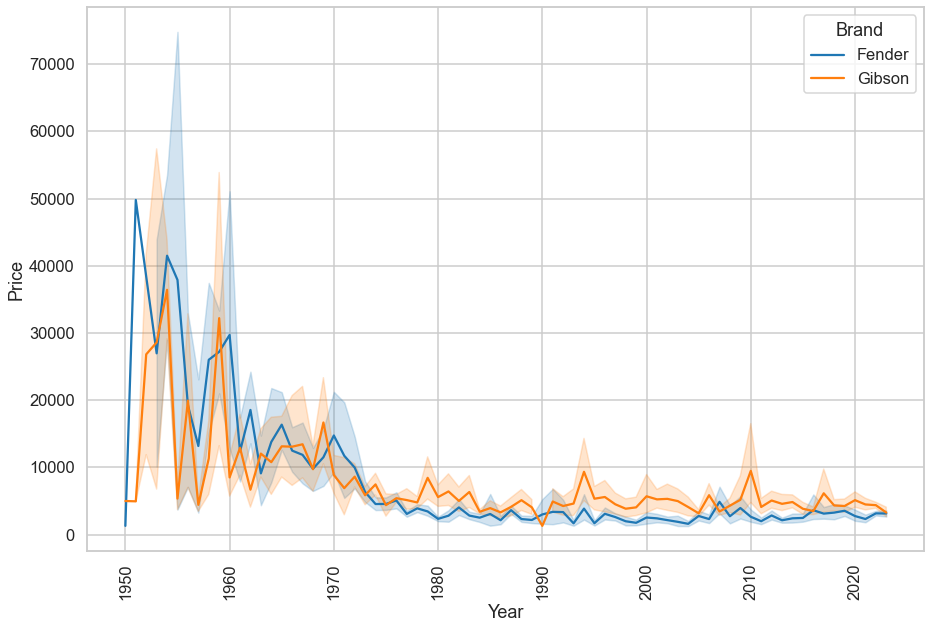

In [36]:
# Вопрос 4 Можно ли сказать, что стоимость инструмента брендов Fender и Gibson зависит от года производства? если да, то как?
# ответом будет график
fg_df = df.query('brands in ["Fender","Gibson"]')
params = fg_df.param_dict.apply(lambda x: ast.literal_eval(x)).copy()
years = [g['Year'] if 'Year' in g.keys() else 'none' for g in params]
years = [int(y) if y.isdigit() else None for y in years ]
prices = fg_df['price_numeric']

data = np.array([years,prices,fg_df['brands']]).T
df_yp = pd.DataFrame(data, columns = ['Year','Price','Brand'])
# Чистим от неадекватных значений
df_yp = df_yp[(~df_yp['Year'].isna())
             &(df_yp['Year'] >= 1950)
             &(df_yp['Year'] <= 2023)
             ]

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,10))

sns.lineplot(x='Year',
             y='Price',
             data=df_yp,
             hue='Brand'
             )

plt.xticks(rotation = 90)

<AxesSubplot:xlabel='Year', ylabel='Count'>

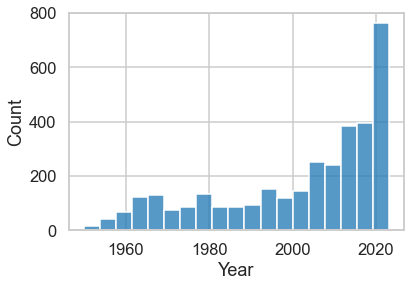

In [37]:
# Видно, что до 2000 года наблюдений мало. Попробуем взять агрегаты
sns.histplot(x='Year', data=df_yp)

1. Видно, что гитары до 1980 года дороже
2. Раритетные (до 1970-го года) гитары Fender дороже гитар Gibson

/var/folders/1f/1t7knmh95bg_g1s30p6r8mp40000gn/T/ipykernel_12805/1832220398.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.sort_values('Year')\
/var/folders/1f/1t7knmh95bg_g1s30p6r8mp40000gn/T/ipykernel_12805/1832220398.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.sort_values('Year')\


<AxesSubplot:xlabel='Year', ylabel='Price'>

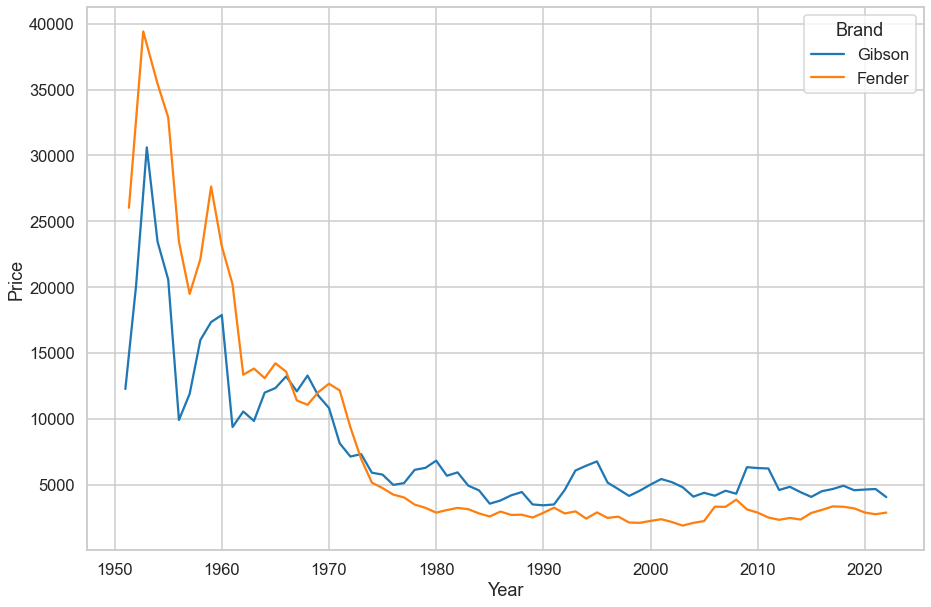

In [55]:
def get_rolling(data, window=3):
    '''
    Строит скользящее среднее по окну для датафрейма
    :param data: датафрейм
    :param window: размер окна (в годах)
    :return: Датафрейм с посчитанными агрегатами
    '''
    data = data.sort_values('Year')\
        .groupby(['Year'], as_index=False)\
        .mean()\
        .rolling(window)\
        .mean()

    return data

df_gibson_roll = get_rolling(df_yp.query('Brand == "Gibson"'))
df_gibson_roll['Brand'] = 'Gibson'
df_fender_roll = get_rolling(df_yp.query('Brand == "Fender"'))
df_fender_roll['Brand'] = 'Fender'

df_yp_roll = pd.concat([df_gibson_roll, df_fender_roll]).reset_index()

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,10))

sns.lineplot(x='Year',
             y='Price',
             data=df_yp_roll,
             hue='Brand'
             )
